<a href="https://colab.research.google.com/github/afullhart/climateanalogs/blob/main/Figures/Zonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset -f

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

'https://stats.stackexchange.com/questions/95731/how-to-calculate-purity'


'https://stats.stackexchange.com/questions/95731/how-to-calculate-purity'

['Zonal_eco3_3.csv', 'Zonal_eco3_6.csv', 'Zonal_eco3_9.csv', 'Zonal_eco3_12.csv', 'Zonal_eco3_15.csv', 'Zonal_eco3_18.csv', 'Zonal_eco3_21.csv', 'Zonal_eco3_24.csv', 'Zonal_eco3_27.csv', 'Zonal_eco3_30.csv']


,LABEL,US_L3_13,US_L3_14,US_L3_18,US_L3_19,US_L3_20,US_L3_21,US_L3_22,US_L3_23,US_L3_24,US_L3_25,US_L3_26,US_L3_5,US_L3_79,US_L3_80,US_L3_81
0,1,271562,2746,2288,4445,60716,3540,88716,54570,28304,31112,88067,38,22462,29715,586
1,2,94154,71947,0,34,65374,22,101501,11804,71068,14609,10233,0,26534,368,123717
2,3,78933,1720,2247,61360,22490,36093,7837,89580,792,0,2915,1360,5268,31676,4


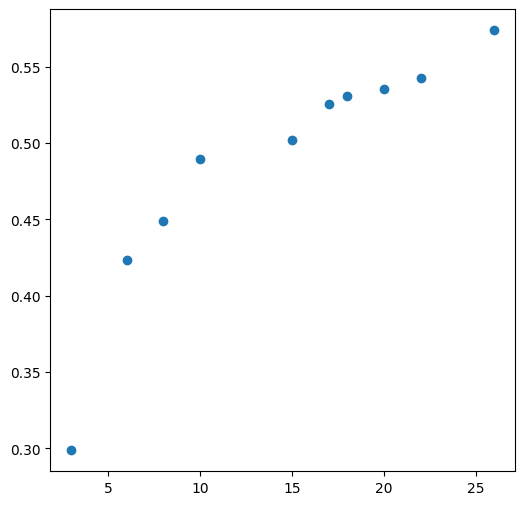

In [12]:

fld = '/content/drive/My Drive/Colab Notebooks/Analogs/Zonal_Test'

files = [f for f in os.listdir(fld) if f[-4:] == '.csv']
print(files)

df = pd.read_csv(os.path.join(fld, files[0]))
display(df)

df_dict = {}
for f in files:
  df = pd.read_csv(os.path.join(fld, f))
  n_classes = len(df)
  df_dict[n_classes] = df

keys = []
for key in df_dict:
  keys.append(key)

keys = sorted(keys)
sorted_dict = {}
for key in keys:
  sorted_dict[key] = df_dict[key]

purity_list = []
for key in sorted_dict:
  df = sorted_dict[key]
  sum = df.iloc[:, 1:].sum().sum()
  max_values_per_row = df.iloc[:, 1:].max(axis=1)
  purity = max_values_per_row.sum()/sum
  purity_list.append(purity)


fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(keys, purity_list)



Optimal Breakpoint: 6.02
Optimal Parameters (b, m1, c1, m2, c2): [6.02020202 0.04160639 0.17401404 0.00618593 0.41349164]


/tmp/ipython-input-2393904680.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(piecewise_linear, x, y, p0=initial_guess)


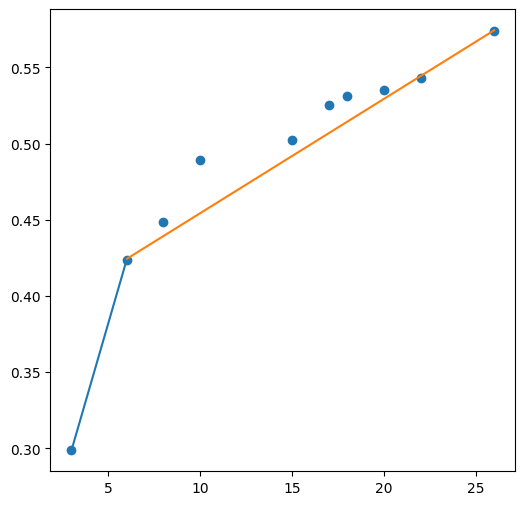

In [23]:
import numpy as np
from scipy.optimize import curve_fit

def piecewise_linear(x, b, m1, c1, m2, c2):
  return np.where(x < b, m1 * x + c1, m2 * x + c2)

def find_optimal_breakpoint(x, y, num_breakpoints=100):
  min_ssr = np.inf  # Initialize minimum sum of squared residuals
  best_breakpoint = None
  best_params = None
  potential_breakpoints = np.linspace(x.min(), x.max(), num_breakpoints)

  for b_candidate in potential_breakpoints:
    try:
      # [breakpoint, slope1, intercept1, slope2, intercept2]
      initial_guess = [b_candidate, 1, 0, 0.5, 0.5]
      params, _ = curve_fit(piecewise_linear, x, y, p0=initial_guess)
      y_pred = piecewise_linear(x, *params)
      ssr = np.sum((y - y_pred)**2)

      if ssr < min_ssr:
        min_ssr = ssr
        best_breakpoint = params[0]
        best_params = params

    except RuntimeError:
      # Handle cases where curve_fit might fail to converge for a given breakpoint
      print('RuntimeError for case {}'.format(b_candidate))
      continue

  return best_breakpoint, best_params


x_data = np.array([float(x) for x in keys])
y_data = np.array([float(x) for x in purity_list])

optimal_b, optimal_params = find_optimal_breakpoint(x_data, y_data)

if optimal_b is not None:
  print(f"Optimal Breakpoint: {optimal_b:.2f}")
  print(f"Optimal Parameters (b, m1, c1, m2, c2): {optimal_params}")
else:
  print("Could not find an optimal breakpoint.")


# You can then use optimal_params to make predictions or visualize the fit
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x_data, y_data)
ax.plot([min(x_data), optimal_b], [optimal_params[1]*min(x_data) + optimal_params[2], optimal_params[1]*optimal_b + optimal_params[2]])
ax.plot([optimal_b, max(x_data)], [optimal_params[1]*optimal_b + optimal_params[2], optimal_params[3]*max(x_data) + optimal_params[4]])




['Zonal_eco3_3.csv', 'Zonal_eco3_6.csv', 'Zonal_eco3_9.csv', 'Zonal_eco3_12.csv', 'Zonal_eco3_15.csv', 'Zonal_eco3_18.csv', 'Zonal_eco3_21.csv', 'Zonal_eco3_24.csv', 'Zonal_eco3_27.csv', 'Zonal_eco3_30.csv']


,LABEL,US_L3_13,US_L3_14,US_L3_18,US_L3_19,US_L3_20,US_L3_21,US_L3_22,US_L3_23,US_L3_24,US_L3_25,US_L3_26,US_L3_5,US_L3_79,US_L3_80,US_L3_81
0,1,271562,2746,2288,4445,60716,3540,88716,54570,28304,31112,88067,38,22462,29715,586
1,2,94154,71947,0,34,65374,22,101501,11804,71068,14609,10233,0,26534,368,123717
2,3,78933,1720,2247,61360,22490,36093,7837,89580,792,0,2915,1360,5268,31676,4


/tmp/ipython-input-1262452321.py:33: RuntimeWarning: divide by zero encountered in log2
  sr = sr.apply(lambda x: x*np.log2(x))
/tmp/ipython-input-1262452321.py:33: RuntimeWarning: invalid value encountered in scalar multiply
  sr = sr.apply(lambda x: x*np.log2(x))


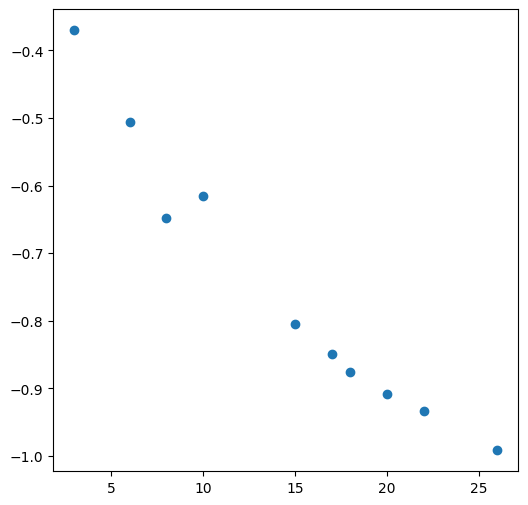

In [ ]:
fld = '/content/drive/My Drive/Colab Notebooks/Analogs/Zonal_Test'

files = [f for f in os.listdir(fld) if f[-4:] == '.csv']
print(files)

df = pd.read_csv(os.path.join(fld, files[0]))
display(df)

df_dict = {}
for f in files:
  df = pd.read_csv(os.path.join(fld, f))
  n_classes = len(df)
  df_dict[n_classes] = df

keys = []
for key in df_dict:
  keys.append(key)

keys = sorted(keys)
sorted_dict = {}
for key in keys:
  sorted_dict[key] = df_dict[key]

entropy_list = []
for key in sorted_dict:
  sorted_dict[key] = df_dict[key]
  df = sorted_dict[key]
  df_sum = df.iloc[:, 1:].sum().sum()
  sum_values_per_col = df.iloc[:, 1:].sum(axis=0)
  entropy = 0
  for i, col_sum in enumerate(sum_values_per_col[:1]):
    sr = df.iloc[:, i+1].divide(col_sum)
    sr = sr.apply(lambda x: x*np.log2(x))
    entropy_sum = sr.sum()
    col_entropy = entropy_sum * (col_sum/df_sum)
    entropy += col_entropy

  entropy_list.append(entropy)


fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(keys, entropy_list)



In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def piecewise_linear(x, b, m1, c1, m2, c2):
  return np.where(x < b, m1 * x + c1, m2 * x + c2)


In [ ]:
def find_optimal_breakpoint(x, y, num_breakpoints=100):
  min_ssr = np.inf  # Initialize minimum sum of squared residuals
  best_breakpoint = None
  best_params = None

  # Define a range of potential breakpoints within the data's x-range
  potential_breakpoints = np.linspace(x.min(), x.max(), num_breakpoints)

  for b_candidate in potential_breakpoints:
    try:
      # Initial guess for parameters (can be refined)
      # [breakpoint, slope1, intercept1, slope2, intercept2]
      initial_guess = [b_candidate, 1, 0, 1, 0]

      # Fit the piecewise linear function
      params, _ = curve_fit(piecewise_linear, x, y, p0=initial_guess)

      # Calculate the sum of squared residuals for this fit
      y_pred = piecewise_linear(x, *params)
      ssr = np.sum((y - y_pred)**2)

      if ssr < min_ssr:
        min_ssr = ssr
        best_breakpoint = params[0]
        best_params = params

    except RuntimeError:
      # Handle cases where curve_fit might fail to converge for a given breakpoint
      continue

  return best_breakpoint, best_params


In [5]:
# Generate some sample data with a known breakpoint
np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data_segment1 = 2 * x_data[:25] + 5 + np.random.normal(0, 1, 25)
y_data_segment2 = -1 * x_data[25:] + 20 + np.random.normal(0, 1, 25)
y_data = np.concatenate((y_data_segment1, y_data_segment2))

# Find the optimal breakpoint and parameters
optimal_b, optimal_params = find_optimal_breakpoint(x_data, y_data)

if optimal_b is not None:
  print(f"Optimal Breakpoint: {optimal_b:.2f}")
  print(f"Optimal Parameters (b, m1, c1, m2, c2): {optimal_params}")
else:
  print("Could not find an optimal breakpoint.")



# You can then use optimal_params to make predictions or visualize the fit
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x_data, y_data)
ax.plot([0, optimal_b], [optimal_params[2], optimal_params[1]*optimal_b + optimal_params[2]])

ax.plot([optimal_b, max(x_data)], [optimal_params[1]*optimal_b + optimal_params[2], optimal_params[3]*optimal_b + optimal_params[4]])


NameError: name 'find_optimal_breakpoint' is not defined